,Temperature,Humidity,Cloud_Cover,Rain_Encoded
0,23.720338,89.592641,50.501694,1
1,27.879734,46.489704,4.990053,0
2,25.069084,83.072843,14.855784,0
3,23.622080,74.367758,67.255282,1
4,20.591370,96.858822,47.676444,0


      Temperature   Humidity  Cloud_Cover
0       23.720338  89.592641    50.501694
1       27.879734  46.489704     4.990053
2       25.069084  83.072843    14.855784
3       23.622080  74.367758    67.255282
4       20.591370  96.858822    47.676444
...           ...        ...          ...
2495    21.791602  45.270902    55.044682
2496    27.558479  46.481744    39.715133
2497    28.108274  43.817178    75.842952
2498    14.789275  57.908105     2.378743
2499    26.554356  97.101517    81.357508

[2500 rows x 3 columns]
0       1
1       0
2       0
3       1
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Rain_Encoded, Length: 2500, dtype: int64
0.9304


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


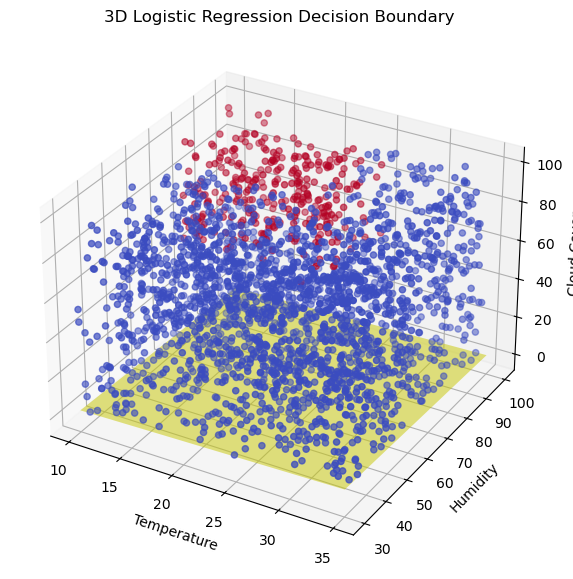

In [ ]:
# %%

from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler

dataframe = pd.read_csv('C:/Users/User/Desktop/Python/ai_assignment/houyang/lab/weather_forecast_data_csv.csv')

display(dataframe.head())

X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]

print(X)
print(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = LogisticRegression(random_state=0).fit(X_scaled, y)

print(clf.score(X_scaled, y))

# plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# data points
ax.scatter(dataframe['Temperature'], dataframe['Humidity'], dataframe['Cloud_Cover'], c=y, cmap='coolwarm', marker='o', label="Data Points")

# grid to plot the decision boundary
x_vals = np.linspace(dataframe['Temperature'].min(), dataframe['Temperature'].max(), 10)
y_vals = np.linspace(dataframe['Humidity'].min(), dataframe['Humidity'].max(), 10)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# predicted values on grid
z_vals = (-clf.intercept_[0] - clf.coef_[0][0] * scaler.transform(np.c_[x_vals.ravel(), y_vals.ravel(), np.zeros(x_vals.size)])[:,0] 
          - clf.coef_[0][1] * scaler.transform(np.c_[x_vals.ravel(), y_vals.ravel(), np.zeros(x_vals.size)])[:,1]) / clf.coef_[0][2]
z_vals = z_vals.reshape(x_vals.shape)

# plot decision boundary
ax.plot_surface(x_vals, y_vals, z_vals, color='yellow', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Cloud Cover')
ax.set_title('3D Logistic Regression Decision Boundary')

plt.show()